
# Quickstart

This document should get you started with pyGAPS, providing several common
operations like creating/reading isotherms, running characterisation routines,
model fitting and data export/plotting.

<div class="alert alert-info">
You can download this code as a Jupyter Notebook and run it for yourself! See banner at the top for the link.
</div>

## Creating an isotherm

First, we need to import the package.

In [1]:
import pygaps as pg

The backbone of the framework is the PointIsotherm class. This class stores the
isotherm data alongside isotherm properties such as the material, adsorbate and
temperature, as well as providing easy interaction with the framework
calculations. There are several ways to create a PointIsotherm object:

- directly from arrays
- from a `pandas.DataFrame`
- parsing AIF, json, csv, or excel files
- loading manufacturer reports (Micromeritics, Belsorp, 3P, Quantachrome, etc.)
- loading from an sqlite database

See the [isotherm creation](../manual/isotherm.rst) part of the documentation
for a more in-depth explanation. For the simplest method, the data can be passed
in as arrays of `pressure` and `loading`. There are three other required
metadata parameters: the adsorbent material name, the adsorbate molecule used,
and the temperature at which the data was recorded.

In [2]:
isotherm = pg.PointIsotherm(
    pressure=[0.1, 0.2, 0.3, 0.4, 0.5, 0.4, 0.35, 0.25, 0.15, 0.05],
    loading=[0.1, 0.2, 0.3, 0.4, 0.5, 0.45, 0.4, 0.3, 0.15, 0.05],
    material='Carbon X1',
    adsorbate='N2',
    temperature=77,
)

We can see that most units are set to defaults and we are being notified about
it. Let's assume we don't want to change anything for now.

To see a summary of the isotherm metadata, use the `print` function:

In [3]:
print(isotherm)

Material: Carbon X1
Adsorbate: nitrogen
Temperature: 77.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar



Unless specified, the loading is read in *mmol/g* and the pressure is read in
*bar*. We can specify (and convert) units to anything from *weight% vs Pa*,
*mol/cm3 vs relative pressure* to *cm3/mol vs torr*. Read more about how pyGAPS
handles units in this [section](../manual/units.rst) of the manual. The isotherm
can also have other properties which are passed in at creation.

Alternatively, the data can be passed in the form of a `pandas.DataFrame`. This
allows for other complementary data, such as ambient pressure, isosteric
enthalpy, or other simultaneous measurements corresponding to each point to be
saved.

The DataFrame should have at least two columns: the pressures at which each
point was recorded, and the loadings for each point. The `loading_key` and
`pressure_key` parameters specify which column in the DataFrame contain the
loading and pressure, respectively. We will also take the opportunity to set our
own units, and a few extra metadata properties.

In [4]:
import pandas as pd

# create (or import) a DataFrame
data = pd.DataFrame({
    'pressure': [0.1, 0.2, 0.3, 0.4, 0.5, 0.45, 0.35, 0.25, 0.15, 0.05],
    'loading': [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.15, 0.05],
    'Enthalpy [kJ/mol]': [15, 14, 13.5, 13, 12, 11, 10, 10, 10, 10],
})

isotherm = pg.PointIsotherm(
    isotherm_data=data,
    pressure_key='pressure',
    loading_key='loading',

    material='Carbon X1',
    adsorbate='N2',
    temperature=20,

    pressure_mode='relative',
    pressure_unit=None,  # we are in relative mode
    loading_basis='mass',
    loading_unit='g',
    material_basis='volume',
    material_unit='cm3',
    temperature_unit='°C',

    material_batch='Batch 1',
    iso_type='characterisation'
)

All passed metadata is stored in the `isotherm.properties` dictionary.

In [5]:
print(isotherm.properties)

{'material_batch': 'Batch 1', 'iso_type': 'characterisation'}


A summary and a plot can be generated by using the `print_info` function. Notice
how the units are automatically taken into account in the plots.

Material: Carbon X1
Adsorbate: nitrogen
Temperature: 350.15K
Units: 
	Uptake in: g/cm3
	Relative pressure
Other properties: 
	material_batch: Batch 1
	iso_type: characterisation



(
    <AxesSubplot:xlabel='Pressure [$p/p^0$]', ylabel='Loading [$g\\/cm^{-3}$]'>,
    <AxesSubplot:ylabel='Enthalpy [kJ/mol]'>
)

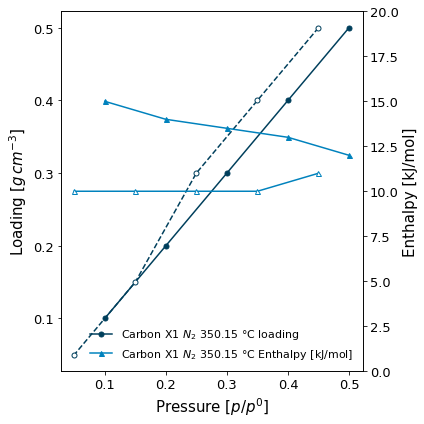

In [6]:
isotherm.print_info(y2_range=[0, 20])

pyGAPS also comes with a variety of parsers that allow isotherms to be saved or
loaded. Here we can use the JSON parser to get an isotherm previously saved on
disk. For more info on parsing to and from various formats see the
[manual](../manual/parsing.rst) and the associated
[examples](../examples/parsing.ipynb).

In [7]:
import pygaps.parsing as pgp
isotherm = pgp.isotherm_from_json(r'data/carbon_x1_n2.json')

We can then inspect the isotherm data using various functions:

In [8]:
isotherm.data()

,pressure,loading,branch
0,1.884754e-07,0.510281,0
1,4.498150e-07,1.022560,0
2,1.058960e-06,1.541660,0
3,2.360800e-06,2.059750,0
4,4.935335e-06,2.580030,0
...,...,...,...
126,1.717322e-01,12.969600,1
127,1.478162e-01,12.792700,1
128,1.243666e-01,12.582000,1
129,1.028454e-01,12.337100,1


In [9]:
isotherm.pressure(branch="des")

array([0.94224978, 0.9175527 , 0.88026274, 0.85005033, 0.8250035 ,
       0.79809718, 0.75394244, 0.72825927, 0.70260524, 0.67857171,
       0.65424575, 0.63045607, 0.60668388, 0.58312446, 0.55678356,
       0.53354765, 0.50847557, 0.48454113, 0.46082723, 0.4361253 ,
       0.41206068, 0.38803881, 0.36445995, 0.33972693, 0.3160004 ,
       0.29139658, 0.26721247, 0.24362584, 0.21954373, 0.195449  ,
       0.17173219, 0.14781621, 0.12436657, 0.1028454 , 0.0884312 ])

To see just a plot of the isotherm, use the `plot` function:

<AxesSubplot:xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

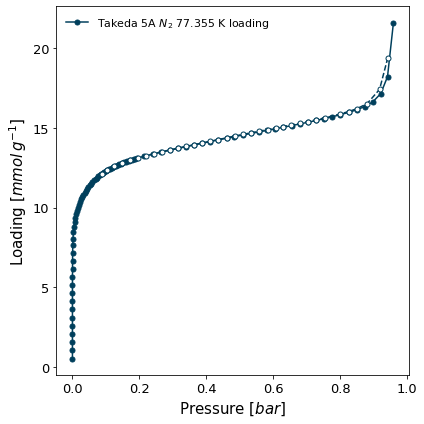

In [10]:
isotherm.plot()

Isotherms can be plotted in different units/modes, or can be permanently
converted. If conversion is desired, find out more in
[this section](../manual/isotherm.rst#converting-isotherm-units-modes-and-basis).
For example, using the previous isotherm:

Isotherm is still in bar and mmol.


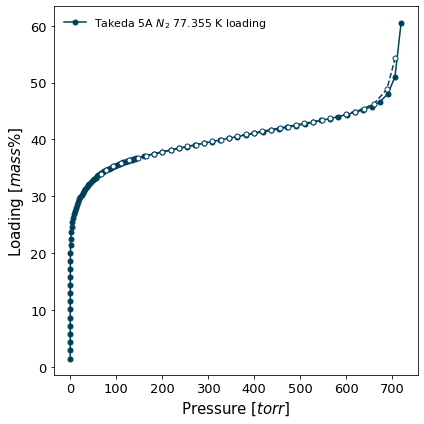

In [11]:
# This just displays the isotherm in a different unit
isotherm.plot(pressure_unit='torr', loading_basis='percent')
# The isotherm is still internally in the same units
print(f"Isotherm is still in {isotherm.pressure_unit} and {isotherm.loading_unit}.")

Isotherm is now permanently in relative pressure.


<AxesSubplot:xlabel='Pressure [$p/p^0$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

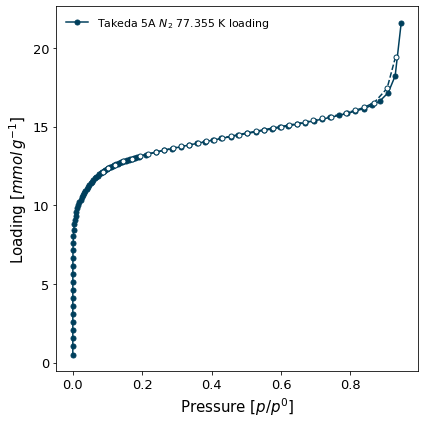

In [12]:
# While the underlying units can be completely converted
isotherm.convert(pressure_mode='relative')
print(f"Isotherm is now permanently in {isotherm.pressure_mode} pressure.")
isotherm.plot()

Now that the PointIsotherm is created, we are ready to do some analysis of its properties.

---

## Isotherm analysis

The framework has several isotherm analysis tools which are commonly used to
characterise porous materials such as:

- BET surface area
- the t-plot method / alpha s method
- mesoporous PSD (pore size distribution) calculations
- microporous PSD calculations
- DFT kernel fitting PSD methods
- isosteric enthalpy of adsorption calculation
- and much more...

All methods work directly with generated Isotherms. For example, to perform a
t-plot analysis and get the results in a dictionary use:

In [13]:
import pprint
import pygaps.characterisation as pgc

result_dict = pgc.t_plot(isotherm)
pprint.pprint(result_dict)

{'results': [{'adsorbed_volume': 0.44934712258371,
              'area': 99.54915759758691,
              'corr_coef': 0.9996658295304236,
              'intercept': 0.012929909242021876,
              'section': [84, 85, 86, 87, 88, 89, 90],
              'slope': 0.0028645150000192613}],
 't_curve': array([0.14381104, 0.14800322, 0.1525095 , 0.15712503, 0.1617626 ,
       0.16612841, 0.17033488, 0.17458578, 0.17879119, 0.18306956,
       0.18764848, 0.19283516, 0.19881473, 0.2058225 , 0.21395749,
       0.2228623 , 0.23213447, 0.2411563 , 0.24949659, 0.25634201,
       0.2635719 , 0.27002947, 0.27633547, 0.28229453, 0.28784398,
       0.29315681, 0.29819119, 0.30301872, 0.30762151, 0.31210773,
       0.31641915, 0.32068381, 0.32481658, 0.32886821, 0.33277497,
       0.33761078, 0.34138501, 0.34505614, 0.34870159, 0.35228919,
       0.35587619, 0.35917214, 0.36264598, 0.36618179, 0.36956969,
       0.37295932, 0.37630582, 0.37957513, 0.38277985, 0.38608229,
       0.3892784 , 0.392439

If in an interactive environment, such as iPython or Jupyter, it is useful to
see the details of the calculation directly. To do this, increase the verbosity
of the method to display extra information, including graphs:

BET area: a = 1110 m2/g
The BET constant is: C = 372.8
Minimum pressure point is 0.0105 and maximum is 0.0979
Statistical monolayer at: n = 0.0114 mol/g
The slope of the BET fit: s = 87.7
The intercept of the BET fit: i = 0.236



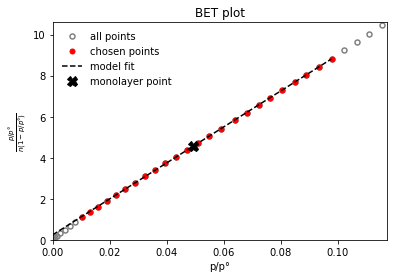

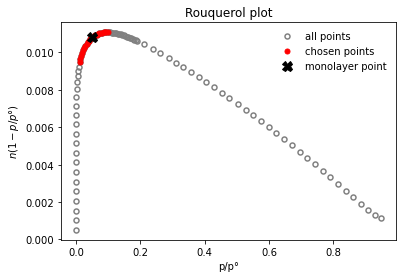

In [14]:
result_dict = pgc.area_BET(isotherm, verbose=True)

Depending on the method, parameters can be specified to tweak the way the
calculations are performed. For example, if a mesoporous size distribution is
desired using the Dollimore-Heal method on the desorption branch of the
isotherm, assuming the pores are cylindrical and that adsorbate thickness can be
described by a Halsey-type thickness curve, the code will look like:

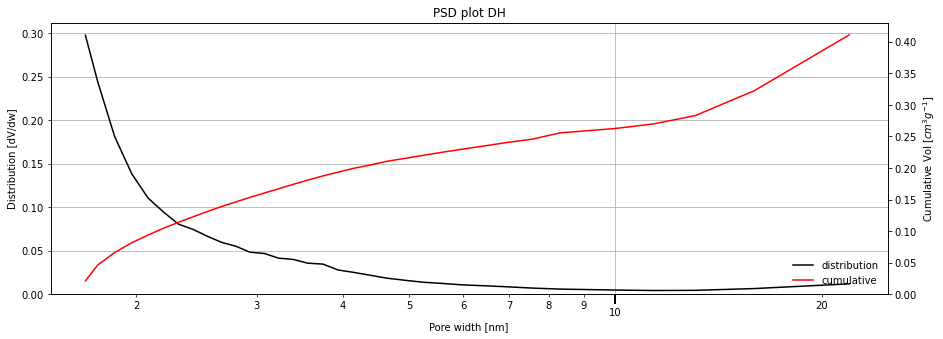

In [15]:
result_dict = pgc.psd_mesoporous(
    isotherm,
    psd_model='DH',
    branch='des',
    pore_geometry='cylinder',
    thickness_model='Halsey',
    verbose=True,
)

For more information on how to use each method, check the
[manual](../manual/characterisation.rst) and the associated
[examples](../examples/characterisation.rst).

---

## Isotherm fitting

The framework comes with functionality to fit point isotherm data with common
isotherm models such as Henry, Langmuir, Temkin, Virial etc.

The model is contained in the ModelIsotherm class. The class is similar to the
PointIsotherm class, and shares the parameters and metadata. However, instead of
point data, it stores model coefficients for the model it's describing.

To create a ModelIsotherm, the same parameters dictionary / `pandas.DataFrame`
procedure can be used. But, assuming we've already created a PointIsotherm
object, we can just pass it to the `pygaps.model_iso` function.

Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.846


<ModelIsotherm 36b10676c8e2cdbfaf4cea112e9e76b9>: 'nitrogen' on 'Takeda 5A' at 77.355 K

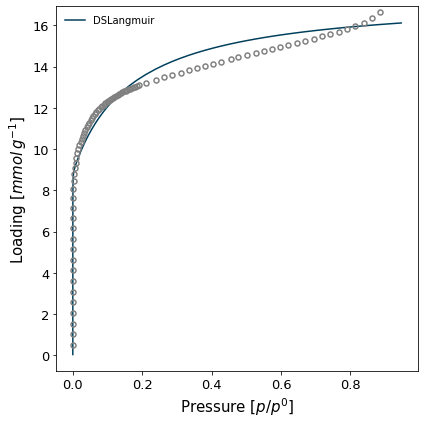

In [16]:
import pygaps.modelling as pgm

model_iso = pgm.model_iso(isotherm, model='DSLangmuir', verbose=True)
model_iso

A minimisation procedure will then attempt to fit the model's parameters to the
isotherm points. If successful, the ModelIsotherm is returned.

In the user wants to screen several models at once, the `model` can be given as
`guess`, to try to find the best fitting model. Below, we will attempt to fit
several simple available models, and the one with the best RMSE will be
returned. This method may take significant processing time, and there is no
guarantee that the model is physically relevant.

Attempting to model using Henry.
Model Henry success, RMSE is 7.42
Attempting to model using Langmuir.
Model Langmuir success, RMSE is 2.12
Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.846
Attempting to model using DR.
Model DR success, RMSE is 1.31
Attempting to model using Freundlich.
Model Freundlich success, RMSE is 0.738
Attempting to model using Quadratic.
Model Quadratic success, RMSE is 0.848
Attempting to model using BET.
Model BET success, RMSE is 1.09
Attempting to model using TemkinApprox.
Model TemkinApprox success, RMSE is 2.05
Attempting to model using Toth.
Model Toth success, RMSE is 0.752
Attempting to model using JensenSeaton.
Model JensenSeaton success, RMSE is 0.533
Best model fit is JensenSeaton.


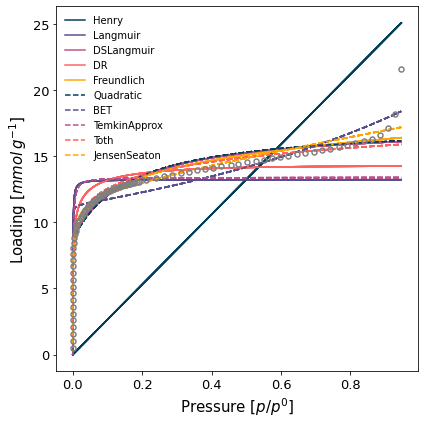

In [17]:
model_iso = pgm.model_iso(isotherm, model='guess', verbose=True)

More advanced settings can also be specified, such as the parameters for the
fitting routine or the initial parameter guess. For in-depth examples and
discussion check the [manual](../manual/modelling.rst) and the associated
[examples](../examples/modelling.rst).

To print the model parameters use the same print method as before.

Material: Takeda 5A
Adsorbate: nitrogen
Temperature: 77.355K
Units: 
	Uptake in: mmol/g
	Relative pressure
Other properties: 
	plot_fit: False
	iso_type: Isotherme
	lab: MADIREL
	instrument: Triflex
	material_batch: Test
	activation_temperature: 200.0
	user: PI
JensenSeaton isotherm model.
RMSE = 0.5325
Model parameters:
	K = 5.516e+08
	a = 16.73
	b = 0.3403
	c = 0.1807
Model applicable range:
	Pressure range: 1.86e-07 - 0.946
	Loading range: 0.51 - 21.6



<AxesSubplot:xlabel='Pressure [$p/p^0$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

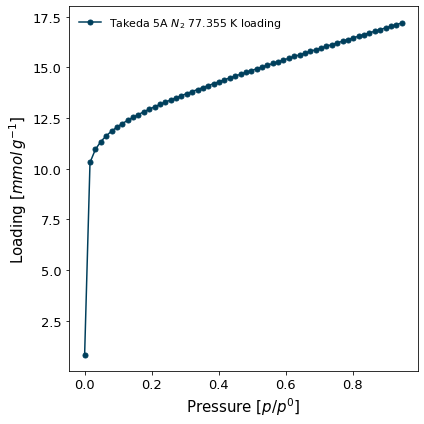

In [18]:
# Prints isotherm parameters and model info
model_iso.print_info()

We can calculate the loading at any pressure using the internal model by using the ``loading_at`` function.

In [19]:
# Returns the loading at 1 bar calculated with the model
model_iso.loading_at(1.0)

17.46787643653736

In [20]:
# Returns the loading for three points in the 0-1 bar range
pressure = [0.1,0.5,1]
model_iso.loading_at(pressure)

array([12.09708239, 14.86182185, 17.46787644])

## Plotting

pyGAPS makes graphing both PointIsotherm and ModelIsotherm objects easy to facilitate
visual observations, inclusion in publications and consistency. Plotting an isotherm is
as simple as:

<AxesSubplot:xlabel='Pressure [$p/p^0$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

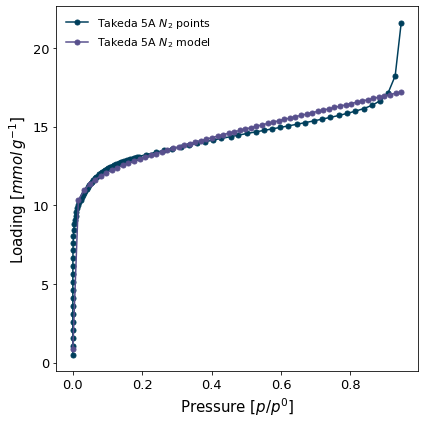

In [21]:
import pygaps.graphing as pgg

pgg.plot_iso(
    [isotherm, model_iso],                          # Two isotherms
    branch='ads',                                   # Plot only the adsorption branch
    lgd_keys=['material', 'adsorbate', 'type'],     # Text in the legend, as taken from the isotherms
)

Here is a more involved plot, where we create the figure beforehand, and specify
many more customisation options.

<AxesSubplot:xlabel='Pressure [$p/p^0$]', ylabel='Loading [$mol\\/g^{-1}$]'>

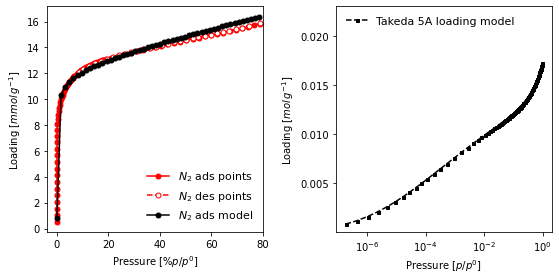

In [22]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

pgg.plot_iso(
    [isotherm, model_iso],
    ax=ax1,
    branch='all',
    pressure_mode="relative%",
    x_range=(None, 80),
    color=["r", "k"],
    lgd_keys=['adsorbate', 'branch', 'type'],
)

model_iso.plot(
    ax=ax2,
    x_points=isotherm.pressure(),
    loading_unit="mol",
    y1_range=(None, 0.023),
    marker="s",
    color="k",
    y1_line_style={
        "linestyle": "--",
        "markersize": 3
    },
    logx=True,
    lgd_pos="upper left",
    lgd_keys=['material', 'key', 'type'],
)

Many settings can be specified to change the look and feel of the graphs. More
explanations can be found in the [manual](../manual/plotting.rst) and in the
[examples](../examples/plotting.ipynb) section.